**Dependencies**

In [2]:
import sys
from obspy import UTCDateTime
from DataDownload import download_seismic_data
from DataProcessing import get_stream,stream_process, plot_graph
from EventIdentification import detect_earthquakes
from CataloguedEvents import find_earthquakes
from utils import *


**Choosing A Date For Testing**

In [5]:
date = UTCDateTime("2024-04-18") 

**Choosing Station And Download**

In [7]:
# station = ['GB', 'EDMD', 'IRIS']
station = ['AM','R50D6','https://data.raspberryshake.org']

# get the coordination for the station
station_coordinates = get_coordinates(station)

# Try to download data and return availability for the date
data_available = download_seismic_data(date, station)

Data for 2024-04-18 already downloaded.


**Original Stream**

1 Trace(s) in Stream:
AM.R50D6.00.EHZ | 2024-04-17T23:29:59.004000Z - 2024-04-19T00:30:01.004000Z | 100.0 Hz, 9000201 samples


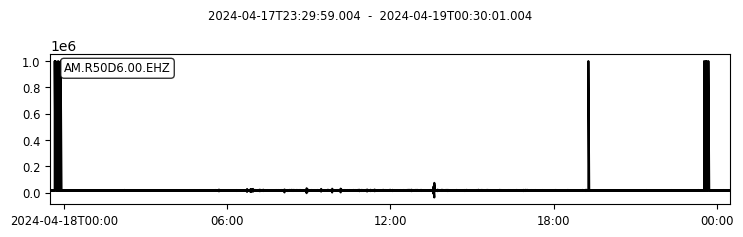

In [8]:
stream = get_stream(date, station)
print(stream)
plot_graph(stream)

**Pre-processing**

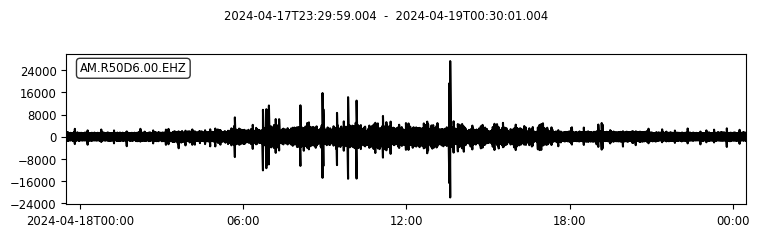

In [9]:
processed_stream = stream_process(stream)
plot_graph(processed_stream)

**Event Identification Using STA/ LTA**

In [10]:
sta_window = 1.9  # Short-time window in seconds
lta_window = 50.0  # Long-time window in seconds
threshold_on = 8.0  # STA/LTA threshold for triggering
threshold_off = 4.0  # STA/LTA threshold for turning off the trigger

earthquakes = detect_earthquakes(processed_stream, sta_window, lta_window, threshold_on, threshold_off)
for quake in earthquakes:
    print(f"Detected earthquake from {quake[0]} to {quake[1]}")

Detected earthquake from 2024-04-18T05:42:40.054000Z to 2024-04-18T05:42:42.204000Z
Detected earthquake from 2024-04-18T06:44:10.604000Z to 2024-04-18T06:44:14.164000Z
Detected earthquake from 2024-04-18T06:52:00.484000Z to 2024-04-18T06:52:02.474000Z
Detected earthquake from 2024-04-18T06:53:32.344000Z to 2024-04-18T06:53:34.544000Z
Detected earthquake from 2024-04-18T06:56:26.584000Z to 2024-04-18T06:56:29.204000Z
Detected earthquake from 2024-04-18T07:19:08.754000Z to 2024-04-18T07:19:09.864000Z
Detected earthquake from 2024-04-18T08:56:13.374000Z to 2024-04-18T08:56:19.434000Z
Detected earthquake from 2024-04-18T09:50:45.164000Z to 2024-04-18T09:50:47.784000Z
Detected earthquake from 2024-04-18T10:09:48.004000Z to 2024-04-18T10:09:49.994000Z
Detected earthquake from 2024-04-18T10:51:54.034000Z to 2024-04-18T10:51:55.864000Z
Detected earthquake from 2024-04-18T11:08:43.314000Z to 2024-04-18T11:08:45.184000Z
Detected earthquake from 2024-04-18T11:24:27.924000Z to 2024-04-18T11:24:29.

**Find Earthquake From Catalogue**

Number of Identified Earthquakes: 2
2 Event(s) in Catalog:
2024-04-18T15:12:38.052000Z | +26.217, -110.508 | 5.6  Mww
2024-04-18T15:11:25.221000Z | +40.004,  +35.976 | 5.6  Mww


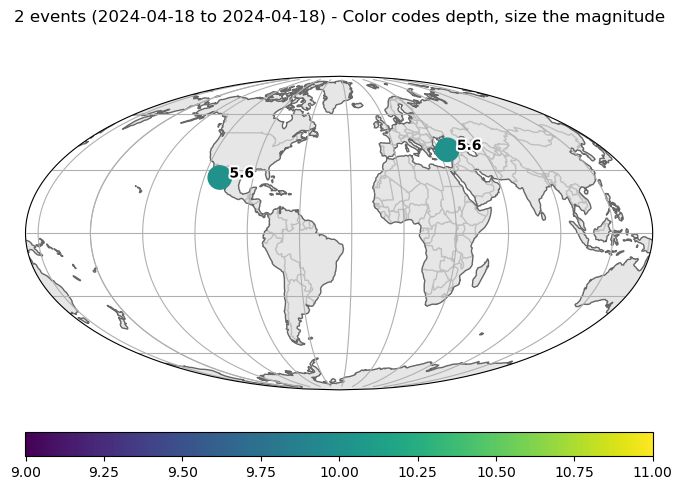

TypeError: 'Figure' object is not subscriptable

In [11]:
catalog = find_earthquakes(
    fromwhere='IRIS',
    latitude=station_coordinates[0],
    longitude=station_coordinates[1],
    date = date,
    radmin=0,
    radmax=90,
    minmag=5.5,
    maxmag=10
)


print('Number of Identified Earthquakes:', len(catalog))
print(catalog) 
catalog.plot()[0]  # Plotting the catalog